In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-quiz-marks-dataset/marks_final.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratsharma7/student-quiz-marks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-quiz-marks-dataset


In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('/kaggle/input/student-quiz-marks-dataset/marks_final.csv')

In [5]:
df.head()

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30
0,1,102003733,AB,AB,AB,AB,AB,AB,3,5,AB,AB,AB,4,12,8.0
1,2,102203002,5,AB,4,4,4,4,4,3,5,5,5,3,40,26.7
2,3,102203003,5,4,4,4,4,5,4,3,4,5,4,2,39,26.0
3,4,102203005,AB,AB,AB,AB,3,5,3,4,4,5,5,AB,29,19.3
4,5,102203007,AB,AB,AB,5,4,3,3,5,3,5,5,3,36,24.0


In [6]:
df['Q1 (5)'].unique()

array(['AB', '5', '3', '4', '2', '0', 'O AB', '1'], dtype=object)

In [7]:
df.describe()


,SNO.,ROLL NUMBER,Top 9 (out of 45),Out of 30
count,1053.00000,1.053000e+03,1053.000000,1053.000000
mean,527.00000,1.027862e+08,38.144349,25.430104
std,304.11922,1.848957e+07,7.150877,4.766492
min,1.00000,1.020037e+08,0.000000,0.000000
25%,264.00000,1.022033e+08,37.000000,24.700000
50%,527.00000,1.022035e+08,40.000000,26.700000
75%,790.00000,1.022038e+08,42.000000,28.000000
max,1053.00000,7.022000e+08,45.000000,30.000000


In [8]:
df.shape[0]

1053

In [9]:
df.isna().sum()

SNO.                 0
ROLL NUMBER          0
Q1 (5)               0
Q2 (5)               0
Q3 (5)               0
Q4 (5)               0
Q5 (5)               0
Q6 (5)               0
Q7 (5)               0
Q8 (5)               0
Q9 (5)               0
Q10 (5)              0
Q11 (5)              0
Q12 (5)              0
Top 9 (out of 45)    0
Out of 30            0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

In [11]:
df_sub = df[['Q1 (5)','Q2 (5)','Q3 (5)','Q4 (5)','Q5 (5)','Q6 (5)','Q7 (5)','Q8 (5)','Q9 (5)','Q10 (5)','Q11 (5)','Q12 (5)',]]
df_sub

,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5)
0,AB,AB,AB,AB,AB,AB,3,5,AB,AB,AB,4
1,5,AB,4,4,4,4,4,3,5,5,5,3
2,5,4,4,4,4,5,4,3,4,5,4,2
3,AB,AB,AB,AB,3,5,3,4,4,5,5,AB
4,AB,AB,AB,5,4,3,3,5,3,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,5,4,AB,5,3,4,AB,3,4,5,4,5
1049,5,2,3,4,3,5,2,5,AB,5,5,5
1050,5,3,5,4,3,3,4,5,4,5,5,5
1051,5,3,3,AB,4,AB,AB,5,AB,5,5,3


In [12]:
x=df_sub.groupby('Q1 (5)')['Q1 (5)'].count()

In [13]:
x_df = pd.DataFrame(x)
x_df=x_df.rename_axis('grades')

In [14]:
df_1=x_df

In [15]:
col = ['Q2 (5)','Q3 (5)','Q4 (5)','Q5 (5)','Q6 (5)','Q7 (5)','Q8 (5)','Q9 (5)','Q10 (5)','Q11 (5)','Q12 (5)']
for i in col:
    x2=df_sub.groupby(i)[i].count()
    x2_df = pd.DataFrame(x2)
    x2_df=x2_df.rename_axis('grades')
    
    df_1 = pd.merge(df_1,x2_df,on='grades')

In [16]:
df_1

,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5)
grades,,,,,,,,,,,,
0,9,11,2,10,13,3,2,1,3,1,1,1
1,1,45,6,3,43,6,19,6,3,3,1,23
2,30,129,32,12,163,46,104,30,10,8,5,87
3,78,254,159,80,286,122,266,185,35,25,55,143
4,227,278,392,373,316,377,367,443,233,139,316,214
5,546,193,342,453,111,402,170,270,662,765,559,472
AB,161,143,120,122,121,97,125,118,107,112,116,113


In [17]:
df_1.columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12']

In [18]:
df_1

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
grades,,,,,,,,,,,,
0,9,11,2,10,13,3,2,1,3,1,1,1
1,1,45,6,3,43,6,19,6,3,3,1,23
2,30,129,32,12,163,46,104,30,10,8,5,87
3,78,254,159,80,286,122,266,185,35,25,55,143
4,227,278,392,373,316,377,367,443,233,139,316,214
5,546,193,342,453,111,402,170,270,662,765,559,472
AB,161,143,120,122,121,97,125,118,107,112,116,113


In [19]:
df_t = df_1.T

In [20]:
df_t

grades,0,1,2,3,4,5,AB
Q1,9,1,30,78,227,546,161
Q2,11,45,129,254,278,193,143
Q3,2,6,32,159,392,342,120
Q4,10,3,12,80,373,453,122
Q5,13,43,163,286,316,111,121
Q6,3,6,46,122,377,402,97
Q7,2,19,104,266,367,170,125
Q8,1,6,30,185,443,270,118
Q9,3,3,10,35,233,662,107
Q10,1,3,8,25,139,765,112


[]

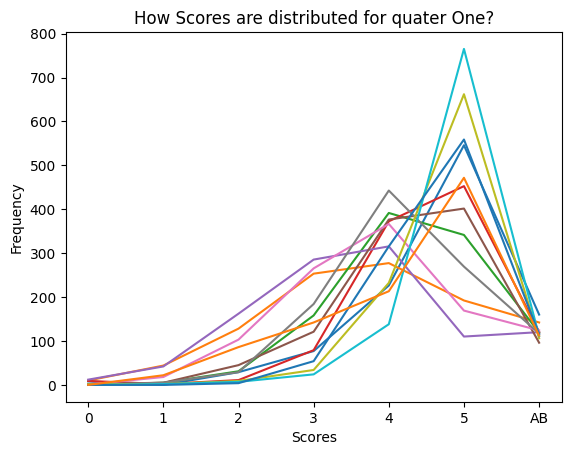

In [21]:
plt.plot(df_1)
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.title('How Scores are distributed for quater One?')
plt.plot()

[]

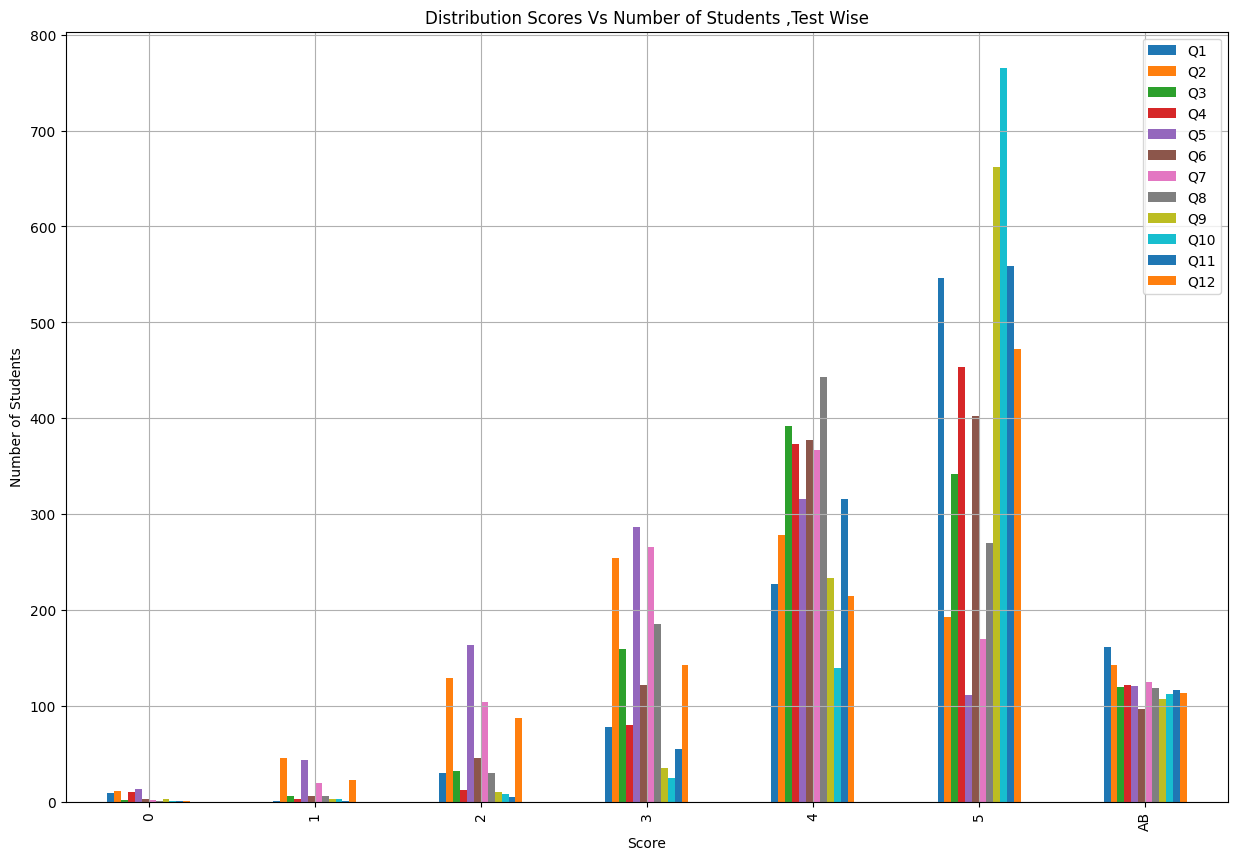

In [22]:

df_1.plot(kind='bar',figsize=(15,10))
plt.plot()
plt.ylabel('Number of Students')
plt.xlabel('Score')
plt.title('Distribution Scores Vs Number of Students ,Test Wise')
plt.grid()
plt.plot()


In [23]:
df_1

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
grades,,,,,,,,,,,,
0,9,11,2,10,13,3,2,1,3,1,1,1
1,1,45,6,3,43,6,19,6,3,3,1,23
2,30,129,32,12,163,46,104,30,10,8,5,87
3,78,254,159,80,286,122,266,185,35,25,55,143
4,227,278,392,373,316,377,367,443,233,139,316,214
5,546,193,342,453,111,402,170,270,662,765,559,472
AB,161,143,120,122,121,97,125,118,107,112,116,113


[]

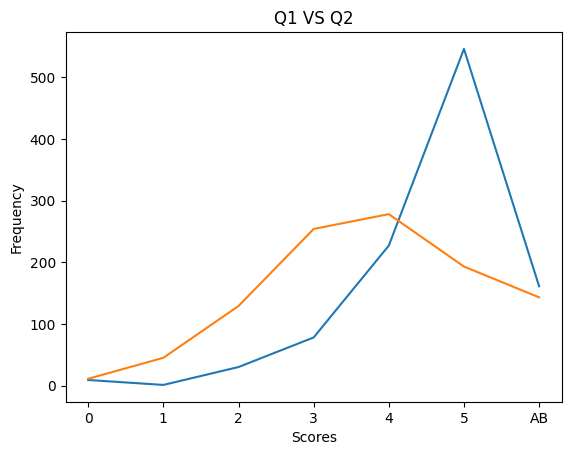

In [24]:
plt.plot(df_1[['Q1','Q2']])
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.title('Q1 VS Q2')
plt.plot()

1. So from the above plot we can see that average 100 students are absent is each test
2. We can also see that the most number of students scored between 4 and 5 in test 9 to 12. This might be because the test were easy or student got aquianted with the pattern.
3. We can also see that the stduents performed the wortst in Q2.
4. We can also see that the number of students scoring 5 are far more compared to the lower scoreres and in comparision to q2 test also.

[]

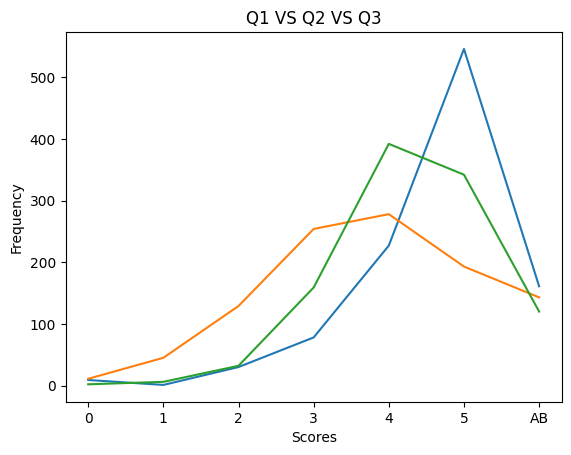

In [25]:
plt.plot(df_1[['Q1','Q2','Q3']])
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.title('Q1 VS Q2 VS Q3')
plt.plot()

[]

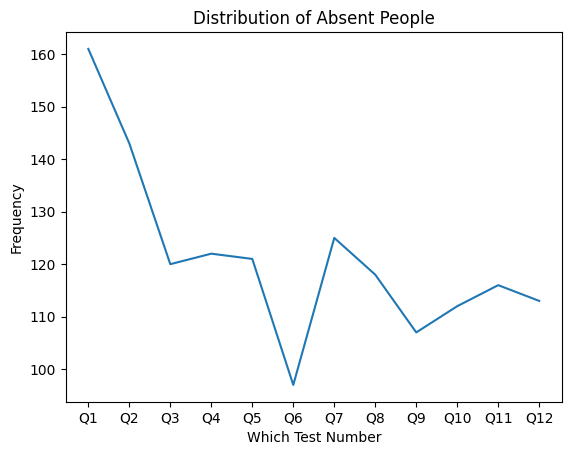

In [26]:
plt.plot(df_t['AB'])
plt.ylabel('Frequency')
plt.xlabel('Which Test Number')
plt.title('Distribution of Absent People')
plt.plot()

1. We can also see that the number of stdents who are absent are least in test number 6 and the most in test.
2. We can also see a decreasing number of students being absent in the test starting from  q1 to q6 this hsows that the engagement of the student are increasing as we are moving forward with the course and the tests.

[]

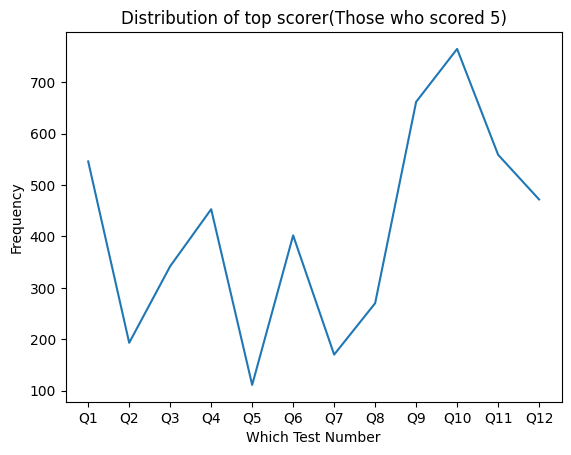

In [27]:
plt.plot(df_t['5'])
plt.ylabel('Frequency')
plt.xlabel('Which Test Number')
plt.title('Distribution of top scorer(Those who scored 5)')
plt.plot()

1. The variability of the number of top scorers in the test might be because of lack of engagement of the students.
2. And the increase in the tops scorers also can not justify that the student engagement increased from Q7 to Q10.

[]

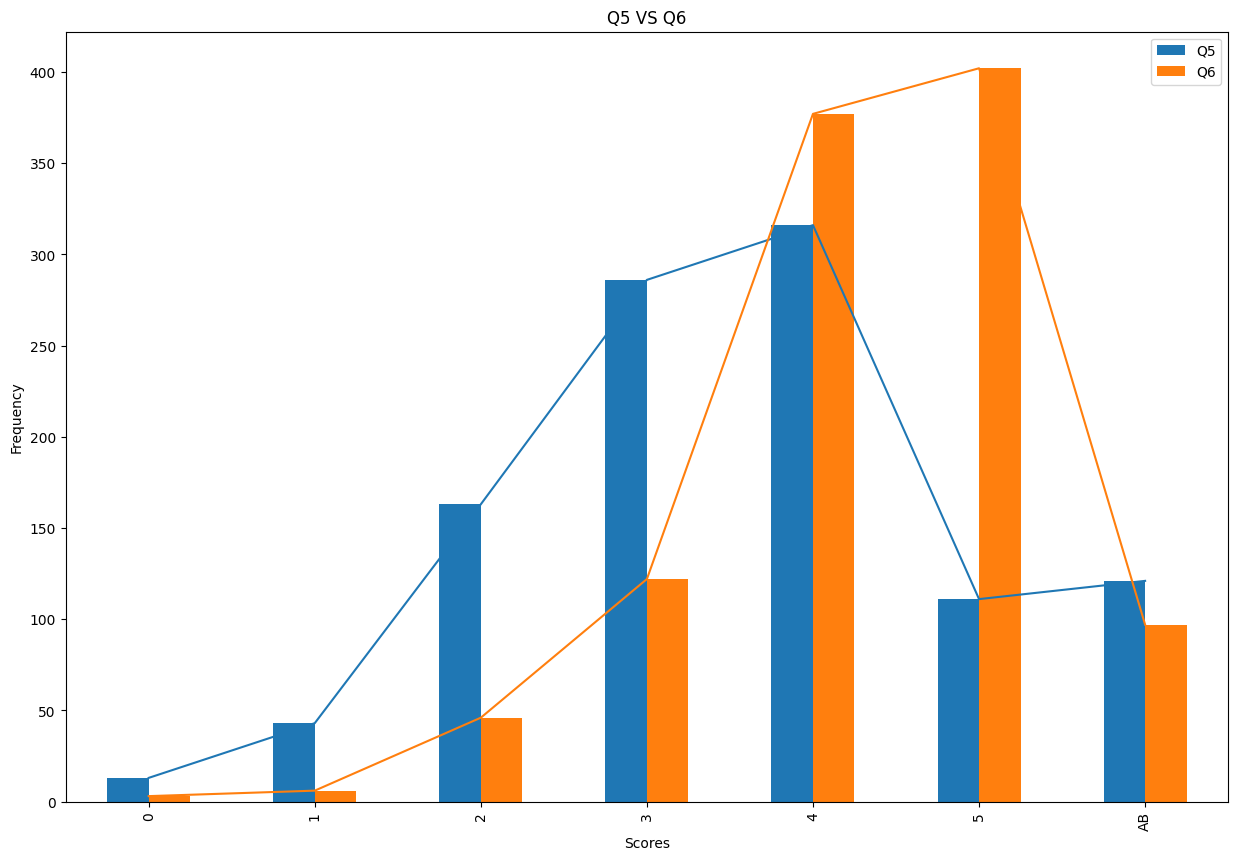

In [28]:
df_1[['Q5','Q6']].plot(kind='bar',figsize=(15,10),legend=True)
plt.plot(df_1[['Q5','Q6']])
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.title('Q5 VS Q6')
plt.plot()

[]

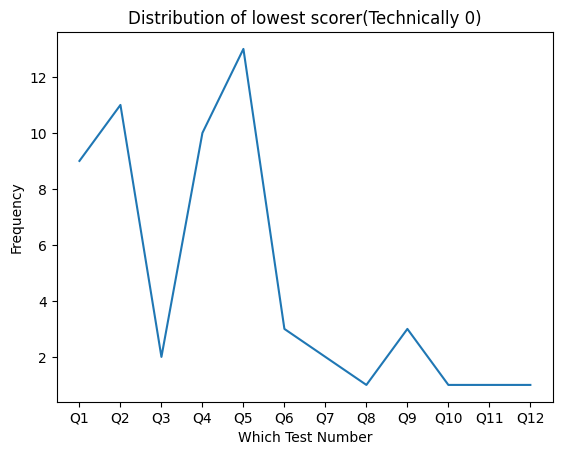

In [29]:
plt.plot(df_t['0'])
plt.ylabel('Frequency')
plt.xlabel('Which Test Number')
plt.title('Distribution of lowest scorer(Technically 0)')
plt.plot()

Here we can also say that the students becdame more comfortable from Q5 test.

[]

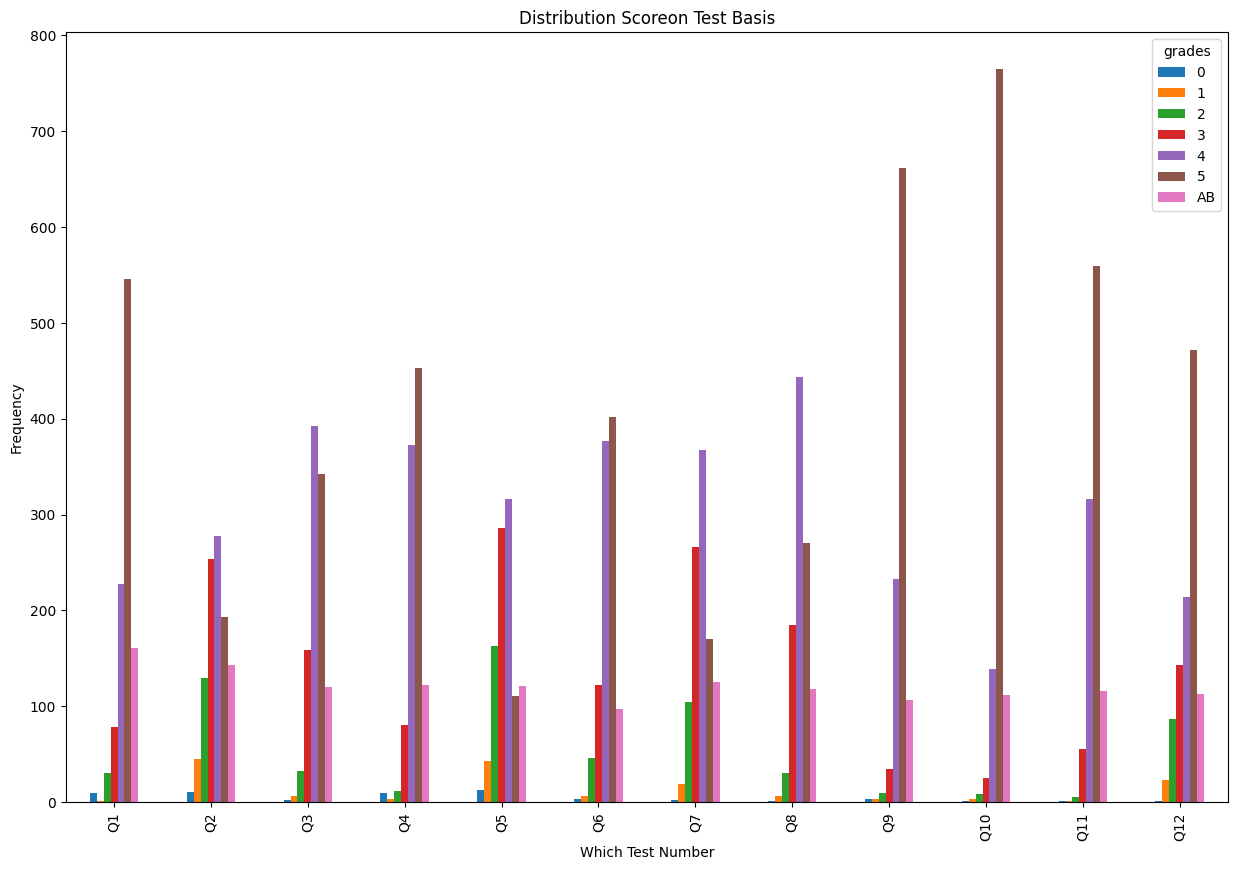

In [30]:
df_t.plot(kind='bar',figsize=(15,10))
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Which Test Number')
plt.title('Distribution Scoreon Test Basis')
plt.plot()

In [31]:
df

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30
0,1,102003733,AB,AB,AB,AB,AB,AB,3,5,AB,AB,AB,4,12,8.0
1,2,102203002,5,AB,4,4,4,4,4,3,5,5,5,3,40,26.7
2,3,102203003,5,4,4,4,4,5,4,3,4,5,4,2,39,26.0
3,4,102203005,AB,AB,AB,AB,3,5,3,4,4,5,5,AB,29,19.3
4,5,102203007,AB,AB,AB,5,4,3,3,5,3,5,5,3,36,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1049,102383062,5,4,AB,5,3,4,AB,3,4,5,4,5,39,26.0
1049,1050,102383067,5,2,3,4,3,5,2,5,AB,5,5,5,40,26.7
1050,1051,102383071,5,3,5,4,3,3,4,5,4,5,5,5,42,28.0
1051,1052,102383081,5,3,3,AB,4,AB,AB,5,AB,5,5,3,33,22.0


[]

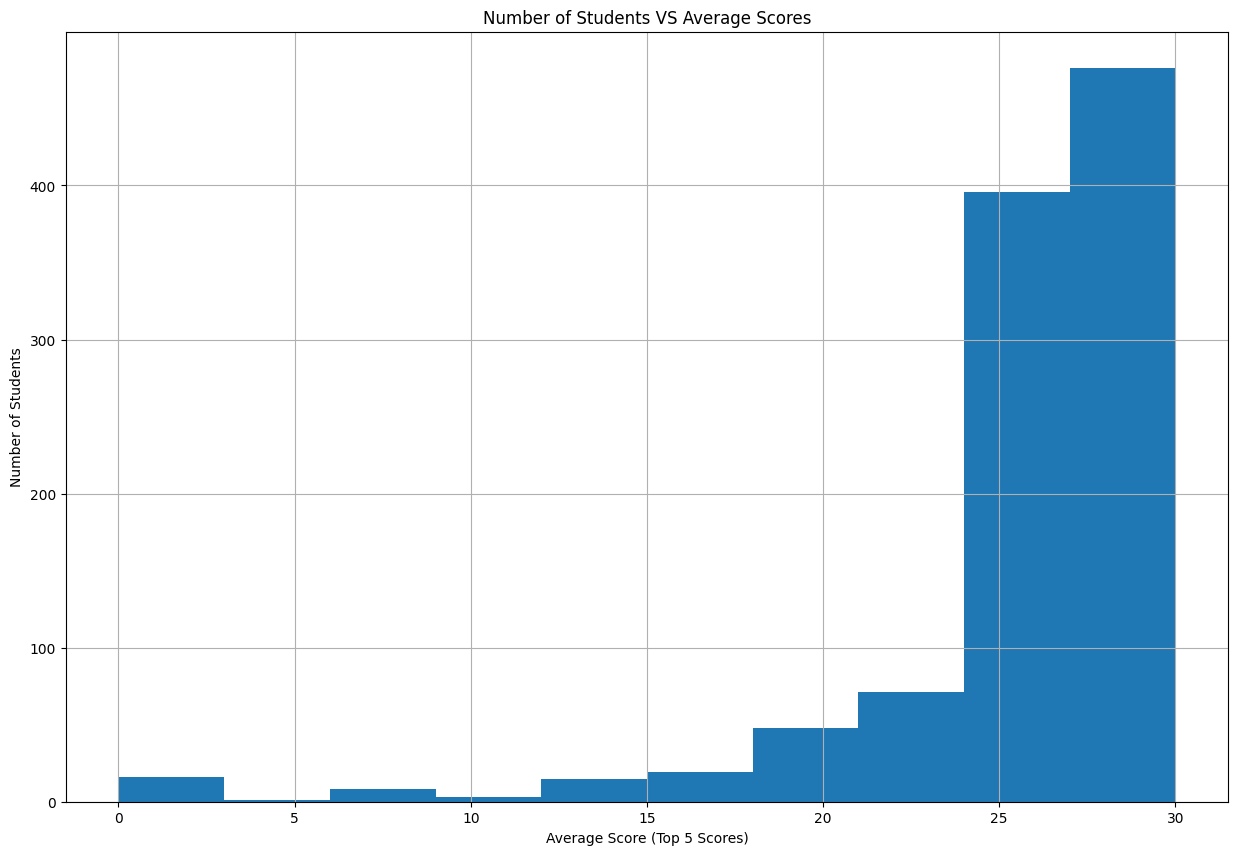

In [32]:
df['Out of 30'].plot(kind='hist',figsize=(15,10))
plt.plot()
plt.ylabel('Number of Students')
plt.xlabel('Average Score (Top 5 Scores)')
plt.title('Number of Students VS Average Scores')
plt.grid(True)
plt.plot()

In [33]:
'''

So what the Out of 30 Coulmn tells 
that it is the best 6 scores of the students out of 12

'''

'\n\nSo what the Out of 30 Coulmn tells \nthat it is the best 6 scores of the students out of 12\n\n'